# Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the Train Data

In [2]:
# load the data
raw_df = pd.read_csv('C:/Users/ANKIT/Desktop/Comp/Metadata/train_meta_df.csv')

In [3]:
raw_df.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,False,True,1.77778,86,3,True,False,0,290,3,0,5,6
1,2,False,True,1.33333,1129,2,True,False,0,1443,0,2,5,6
2,3,False,True,1.76667,1163,2,True,False,0,329,0,1,5,6
3,4,False,True,1.77778,1326,2,True,False,0,63,0,3,5,6
4,5,False,True,1.77273,2612,2,True,False,3,37,0,0,5,6


In [4]:
raw_df.shape

(3000, 14)

In [5]:
raw_df.isnull().sum()

comp_id           0
ad_blocked        0
embed             0
ratio             0
duration          0
language          0
partner           0
partner_active    0
n_likes           0
views             0
n_tags            0
n_formats         0
dayofweek         0
hour              0
dtype: int64

In [6]:
raw_df.dtypes

comp_id             int64
ad_blocked           bool
embed                bool
ratio             float64
duration            int64
language            int64
partner              bool
partner_active       bool
n_likes             int64
views               int64
n_tags              int64
n_formats           int64
dayofweek           int64
hour                int64
dtype: object

# Data Cleansing

In [7]:
raw_df['ad_blocked'] = raw_df['ad_blocked'].replace({True: 1, False: 0})

In [8]:
raw_df['embed'] = raw_df['embed'].replace({True: 1, False: 0})
raw_df['partner'] = raw_df['partner'].replace({True: 1, False: 0})
raw_df['partner_active'] = raw_df['partner_active'].replace({True: 1, False: 0})

In [9]:
raw_df.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,0,1,1.77778,86,3,1,0,0,290,3,0,5,6
1,2,0,1,1.33333,1129,2,1,0,0,1443,0,2,5,6
2,3,0,1,1.76667,1163,2,1,0,0,329,0,1,5,6
3,4,0,1,1.77778,1326,2,1,0,0,63,0,3,5,6
4,5,0,1,1.77273,2612,2,1,0,3,37,0,0,5,6


In [10]:
num_col = ['ratio', 'duration']

In [11]:
cat_col = ['ad_blocked', 'embed','partner','partner_active','language','n_likes', 'n_tags', 'n_formats','dayofweek', 'hour']

In [12]:
len(num_col),len(cat_col)

(2, 10)

# Distribution

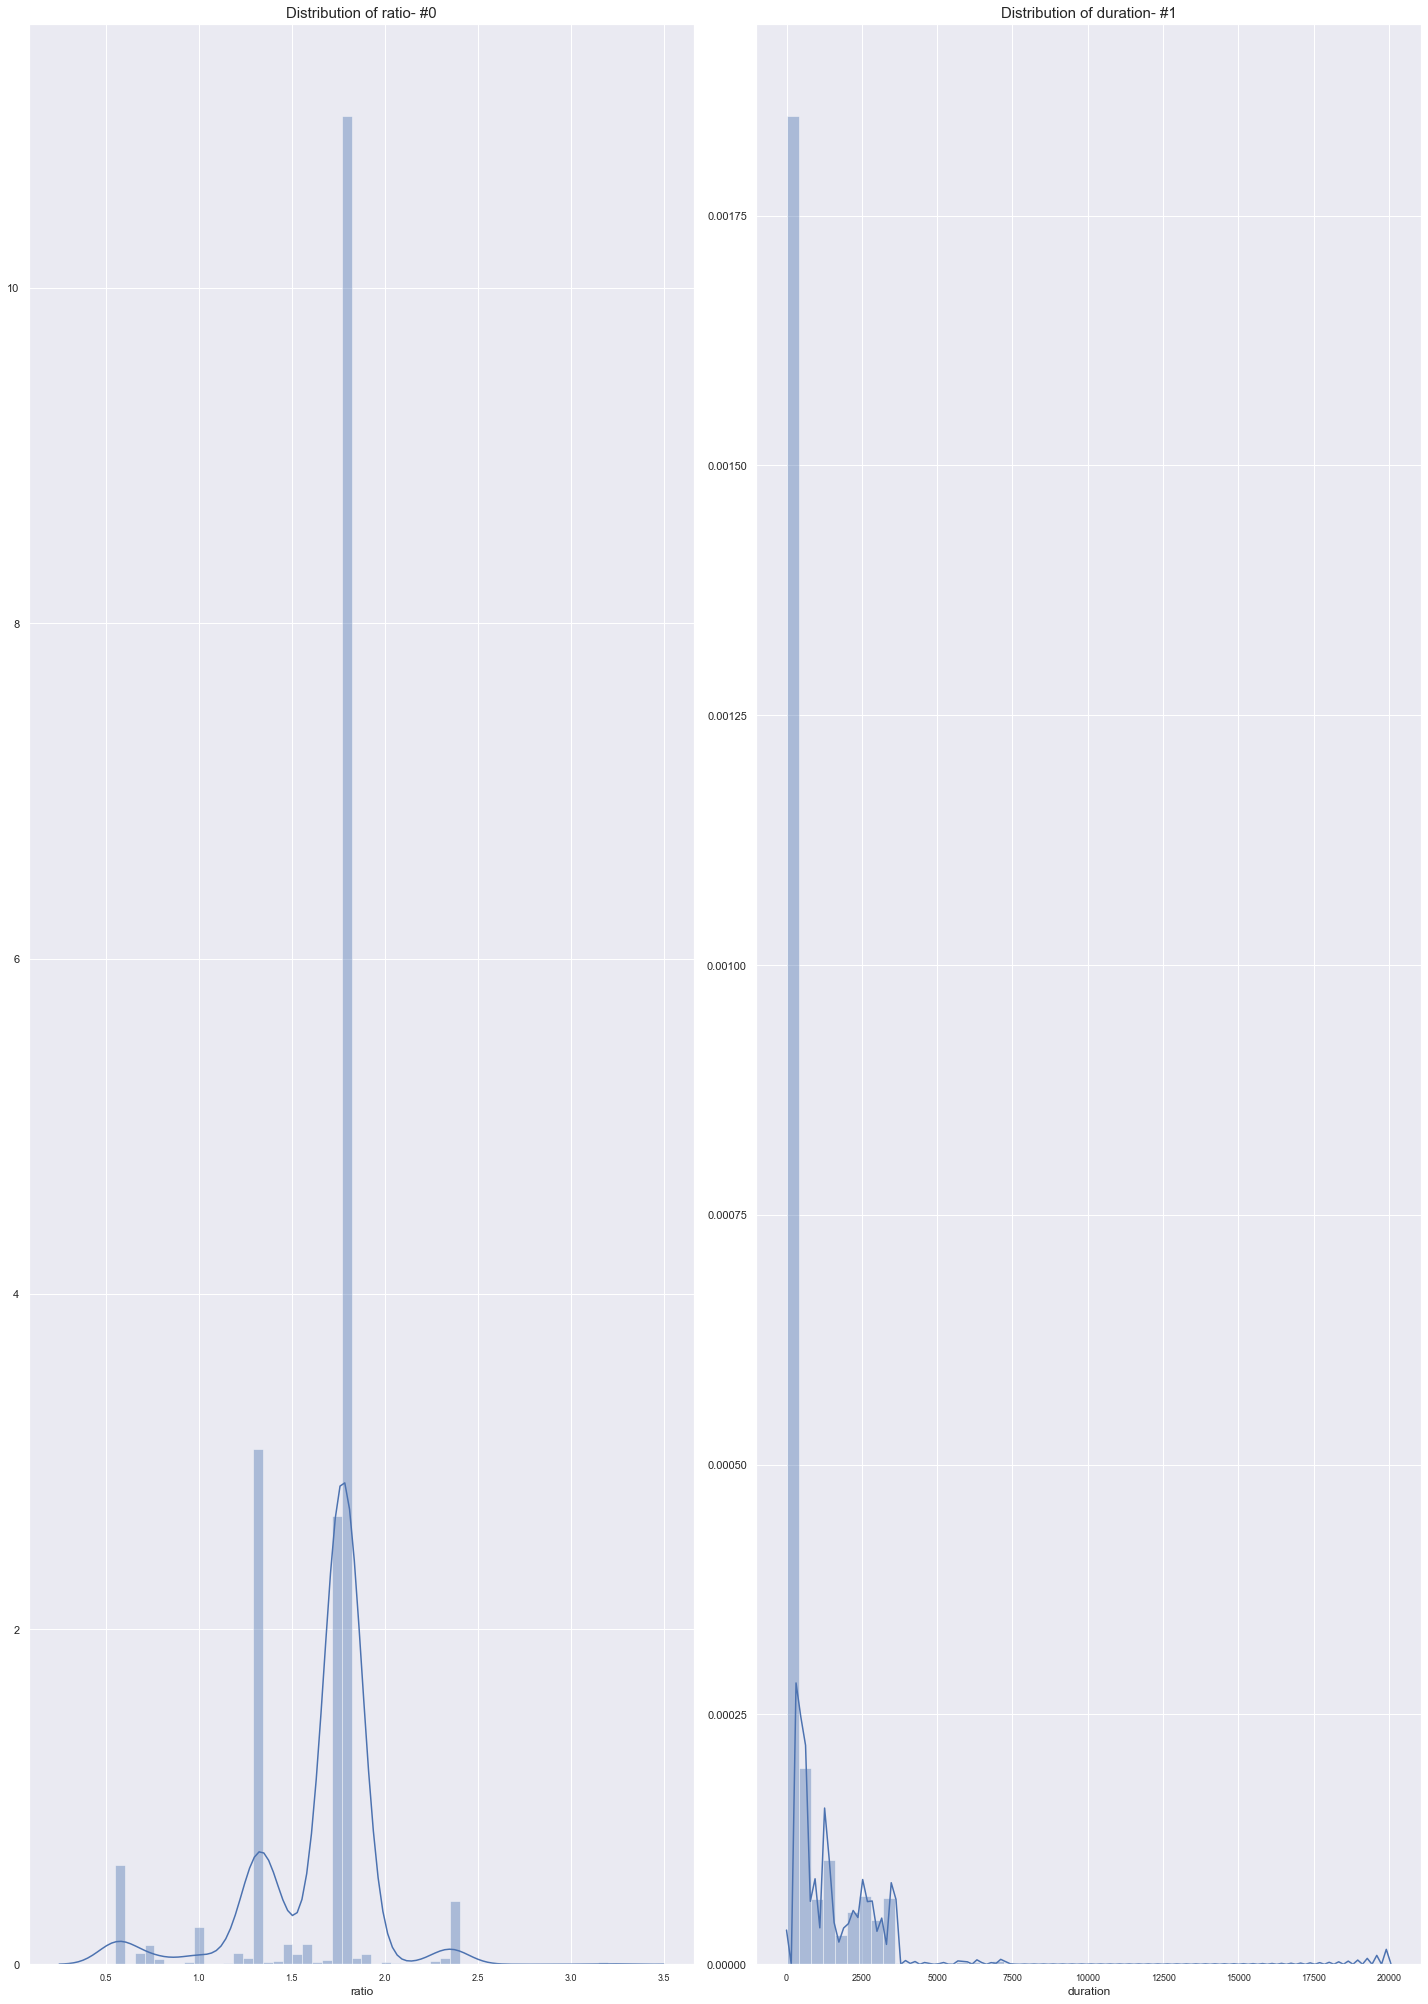

In [13]:
# numerical variabels distributions
plt.figure(figsize=(20,28))
for i in range(0,len(num_col)):
    plt.subplot(1,2,i+1)
    sns.distplot(raw_df[num_col[i]],kde_kws={'bw': 0.1})
    plt.title("Distribution of {}- #{}".format(num_col[i],i),fontsize=15)
    plt.xticks(size=9)
plt.tight_layout()

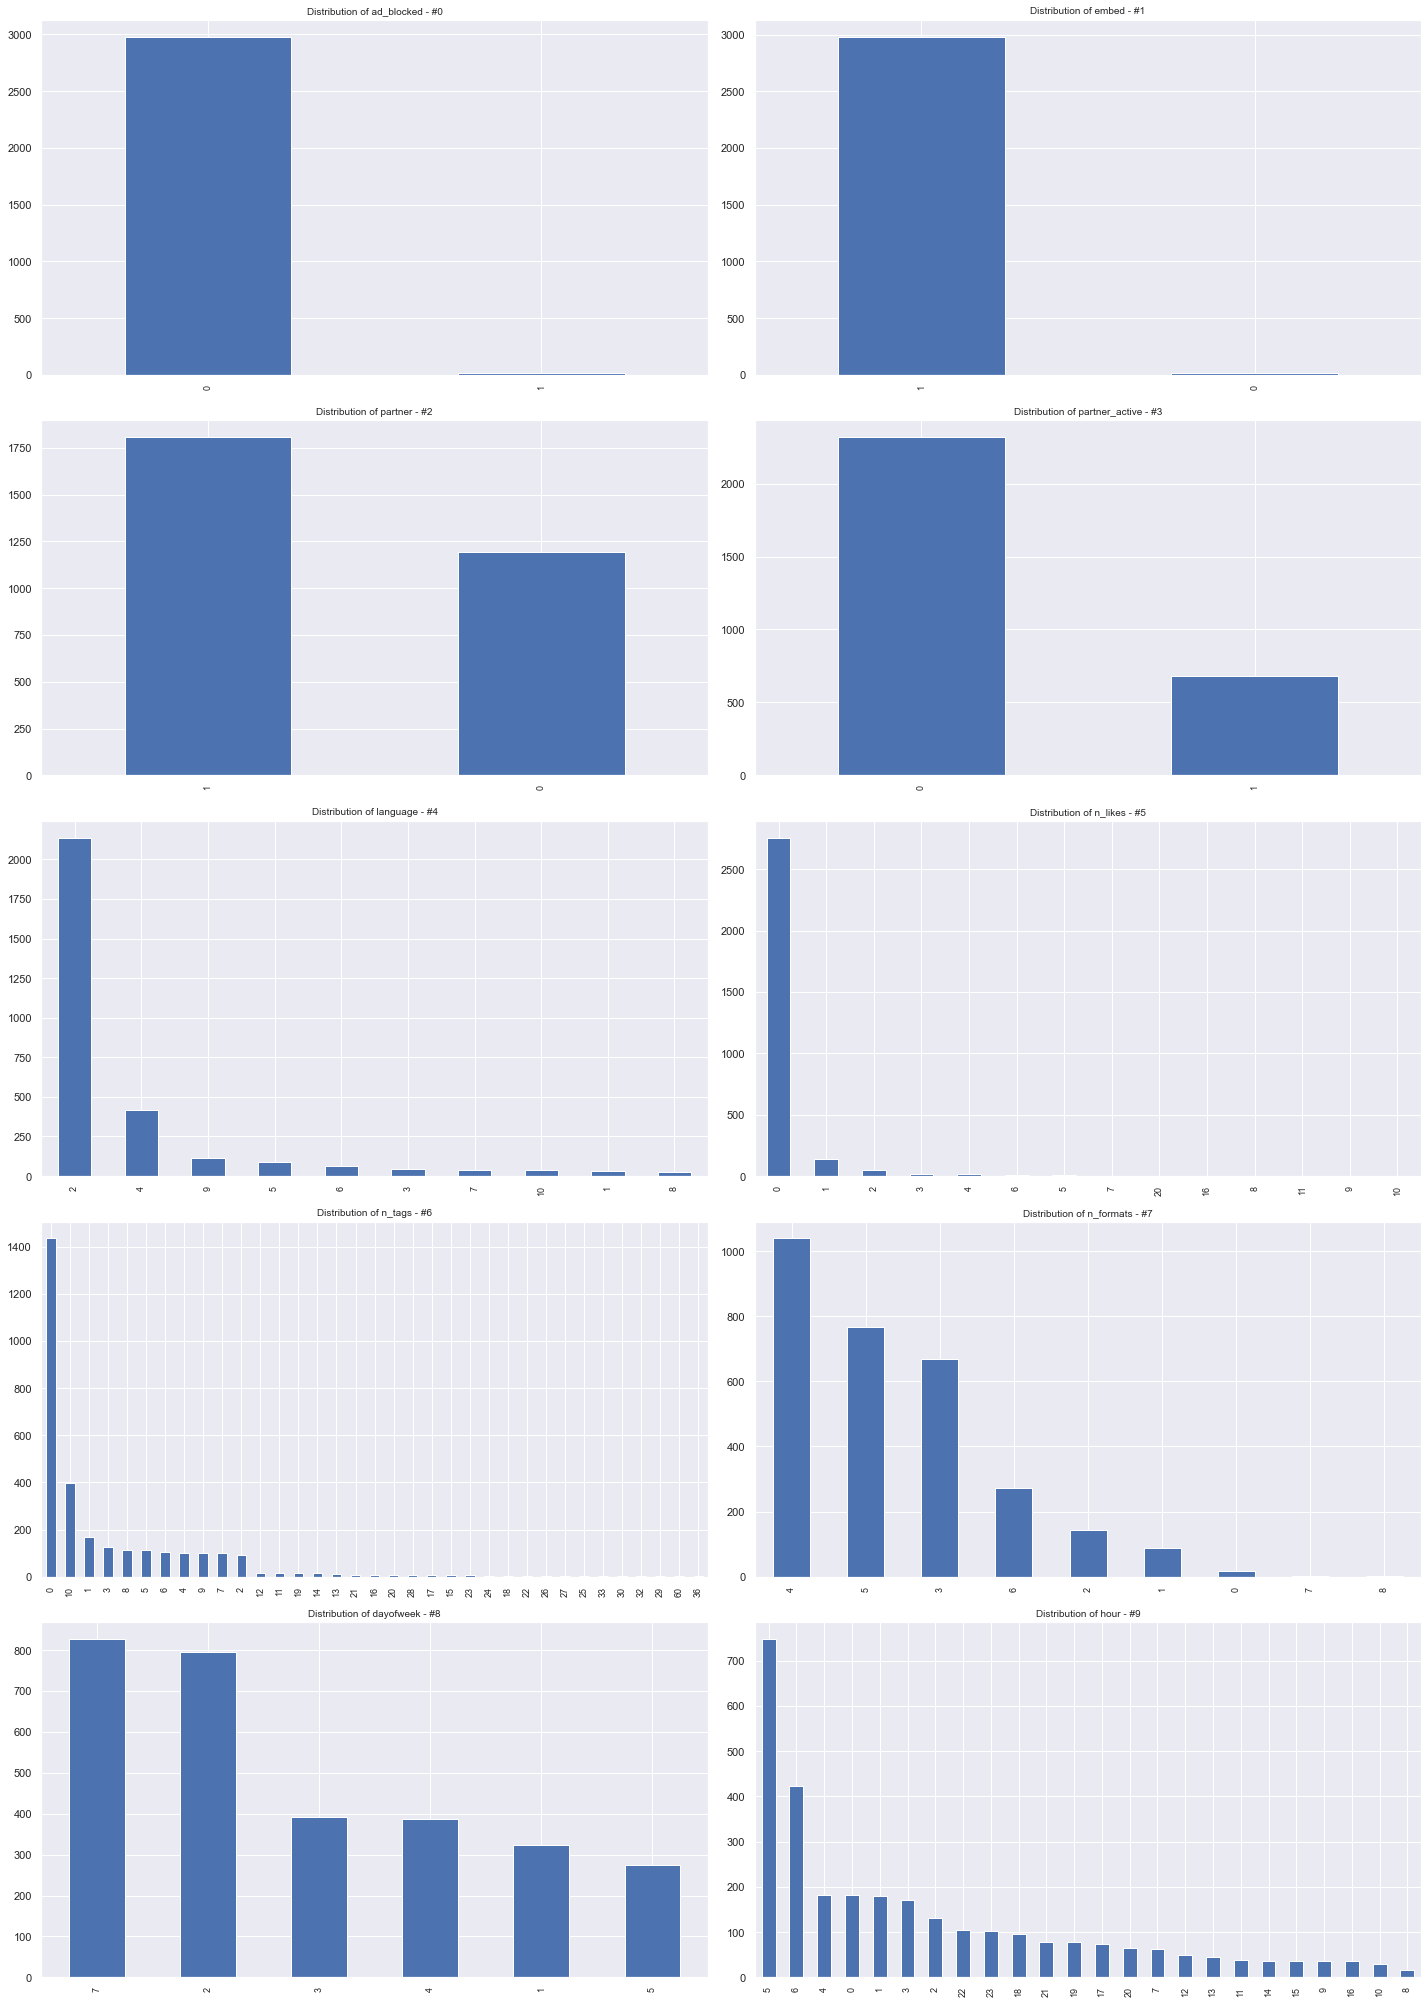

In [14]:
# catogorical data variabels distributions
plt.figure(figsize=(20,28))
for i in range(0,len(cat_col)):
    plt.subplot(5,2,i+1)
    raw_df[cat_col[i]].value_counts().plot(kind='bar')
    plt.title("Distribution of {} - #{}".format( cat_col[i], i),fontsize=10)
    plt.xticks(size=9)

plt.tight_layout()

# Numerical Variabels VS Target

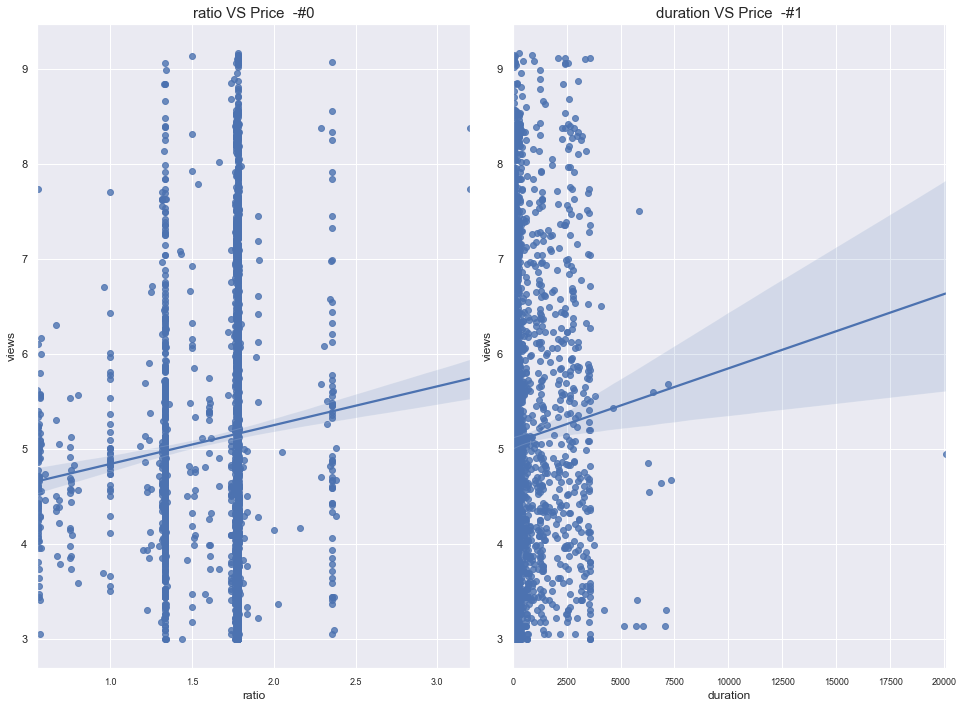

In [15]:
# numerical variabels vs target
plt.figure(figsize=(20,10))
for i in range(0,len(num_col)):
    plt.subplot(1,3,i+1)
    sns.regplot(raw_df[num_col[i]],np.log(raw_df["views"]))
    plt.title("{} VS Price  -#{}".format(num_col[i],i),fontsize=15)
    plt.xticks(size=9)
plt.tight_layout()

# Outlier Removal

In [16]:
# we can see that some variables have "extrem" outliers or only contain sigle value which means those variables are 
# not really help us to explore more and cannot give us more information
# here I will simply remove those kind of variables
remove_index=[0,1]
remove_col=[cat_col[i] for i in remove_index]
remove_col

['ad_blocked', 'embed']

In [17]:
raw_df.drop(columns=remove_col,inplace=True) # drop those columns

In [18]:
# update cat_col
for i in remove_col:
    cat_col.remove(i)

print(cat_col)# double check

['partner', 'partner_active', 'language', 'n_likes', 'n_tags', 'n_formats', 'dayofweek', 'hour']


In [19]:
len(num_col),len(cat_col)

(2, 8)

<AxesSubplot:xlabel='views'>

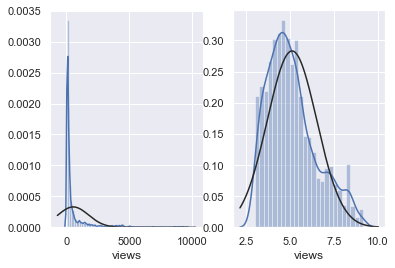

In [20]:
from scipy.stats import norm, skew #for some statistics
plt.subplot(1,2,1)
# distribution of Target
sns.distplot(raw_df["views"],fit=norm)
# Get the fitted parameters used by the function
plt.subplot(1,2,2)
sns.distplot(np.log(raw_df["views"]),fit=norm)

In [21]:
# remove outlier for # 0,1,2 numerical variables 

# create a function to remove outliers 
def outlier_removal(df,col,quantile):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.title('Distribution Before Outlier Removal')
    plt.subplot(1,2,2)
    df_new=df[df[col]<df[col].quantile(quantile)]
    sns.distplot(df_new[col])
    plt.title('Distribution After Outlier Removal')
    plt.tight_layout()
    return df_new

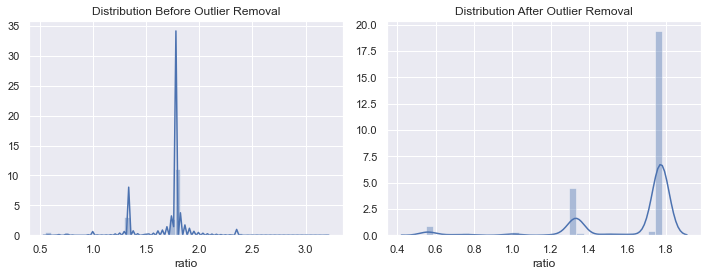

In [22]:
raw_df1 = outlier_removal(raw_df,num_col[0],0.95)

,comp_id,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,1.77778,86,3,1,0,0,290,3,0,5,6
1,2,1.33333,1129,2,1,0,0,1443,0,2,5,6
2,3,1.76667,1163,2,1,0,0,329,0,1,5,6
3,4,1.77778,1326,2,1,0,0,63,0,3,5,6
4,5,1.77273,2612,2,1,0,3,37,0,0,5,6


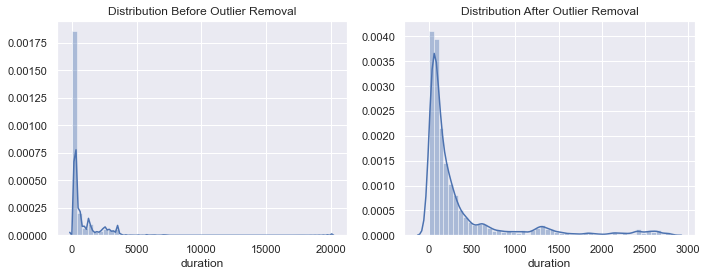

In [23]:
raw_df2 = outlier_removal(raw_df1,num_col[1],0.95)
raw_df2.head()

# Catogorical Variables Distributions

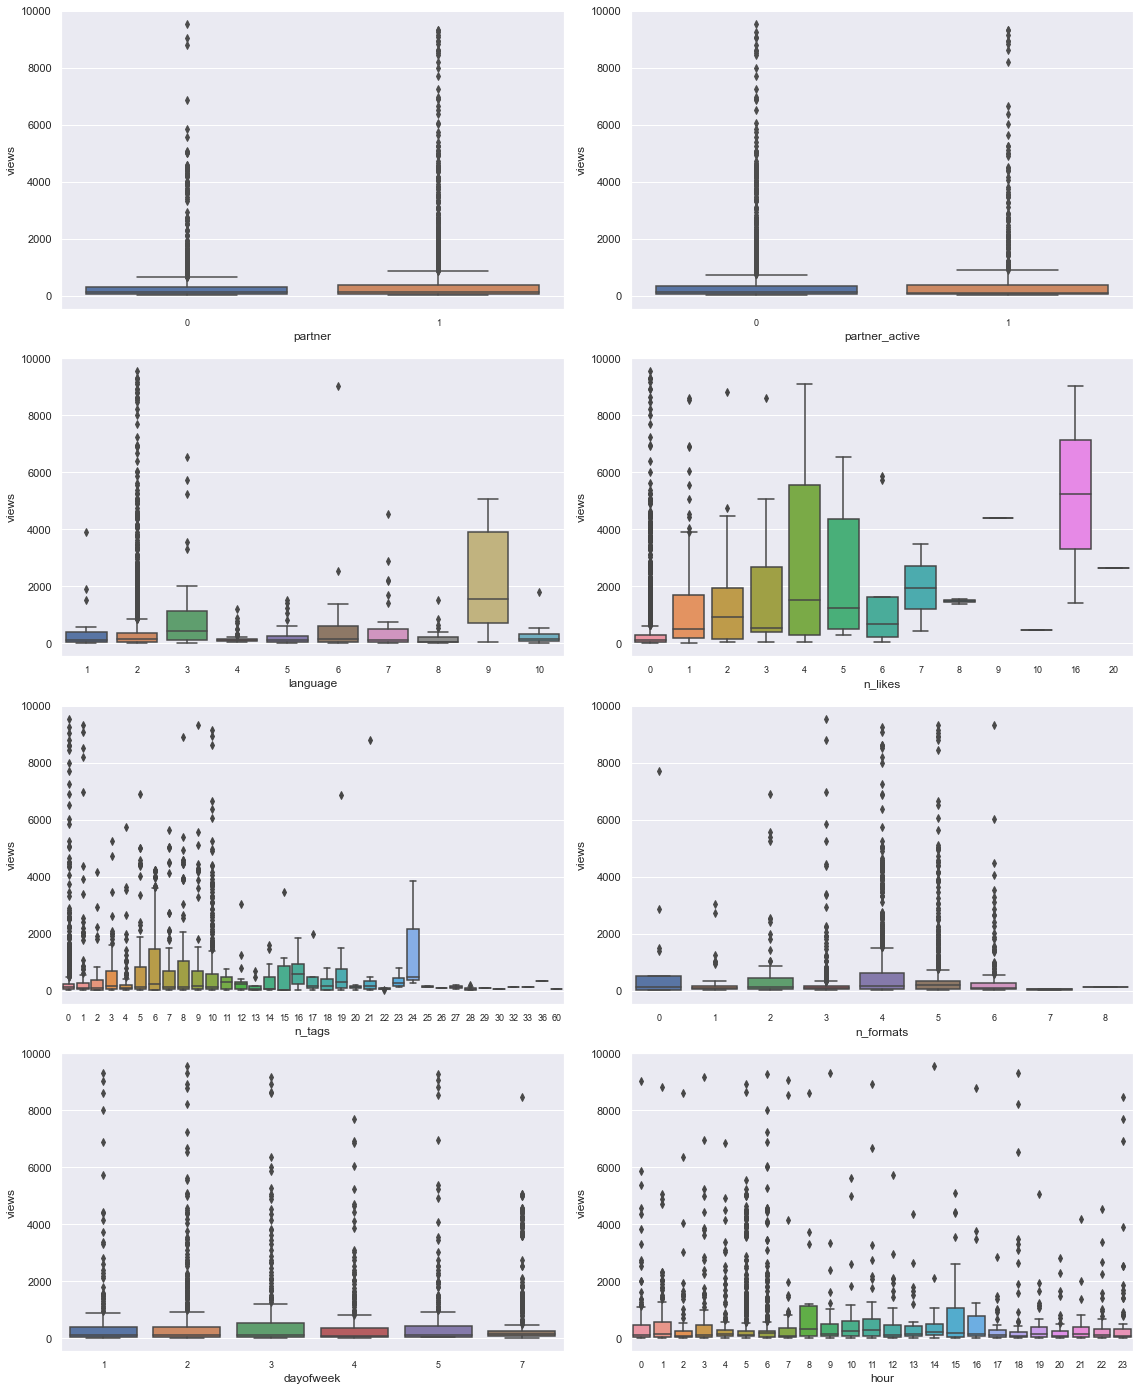

In [24]:
# catogorical variabels distributions
plt.figure(figsize=(16,48))
for i in range(0,len(cat_col)):
    plt.subplot(10,2,i+1)
    sns.boxplot(raw_df2[cat_col[i]],raw_df2["views"])
   # plt.title("Distribution of {}".format( cat_col[i]),fontsize=10)
    plt.xticks(size=9)

plt.tight_layout()

# Scaled Data

In [25]:
# Declare inputs and target
inputs = raw_df2[cat_col+num_col]
target = np.log(raw_df2.views)

In [26]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [27]:
inputs_scaled=pd.DataFrame(data=inputs_scaled,columns=inputs.columns)
inputs_scaled.head()

,partner,partner_active,language,n_likes,n_tags,n_formats,dayofweek,hour,ratio,duration
0,0.828079,-0.557773,0.036583,-0.186716,-0.194239,-3.438927,0.494414,-0.290063,0.517438,-0.482723
1,0.828079,-0.557773,-0.488432,-0.186716,-0.767670,-1.740889,0.494414,-0.290063,-0.977699,1.336613
2,0.828079,-0.557773,-0.488432,-0.186716,-0.767670,-2.589908,0.494414,-0.290063,0.480064,1.395920
3,0.828079,-0.557773,-0.488432,-0.186716,-0.767670,-0.891870,0.494414,-0.290063,0.517438,1.680246
4,0.828079,-0.557773,-0.488432,3.067538,-0.767670,-3.438927,0.494414,-0.290063,0.500450,3.923453


# Train Test Split

In [28]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=520)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", x_test.shape, "Target: ",y_test.shape)

Training set - Features:  (2124, 10) Target:  (2124,)
Testing set - Features:  (531, 10) Target:  (531,)


# Feature Selection

In [29]:
#prepare our data 
feature_columns=inputs.columns
x_train = pd.DataFrame(data=x_train, columns=feature_columns)
x_test = pd.DataFrame(data=x_test, columns=feature_columns)

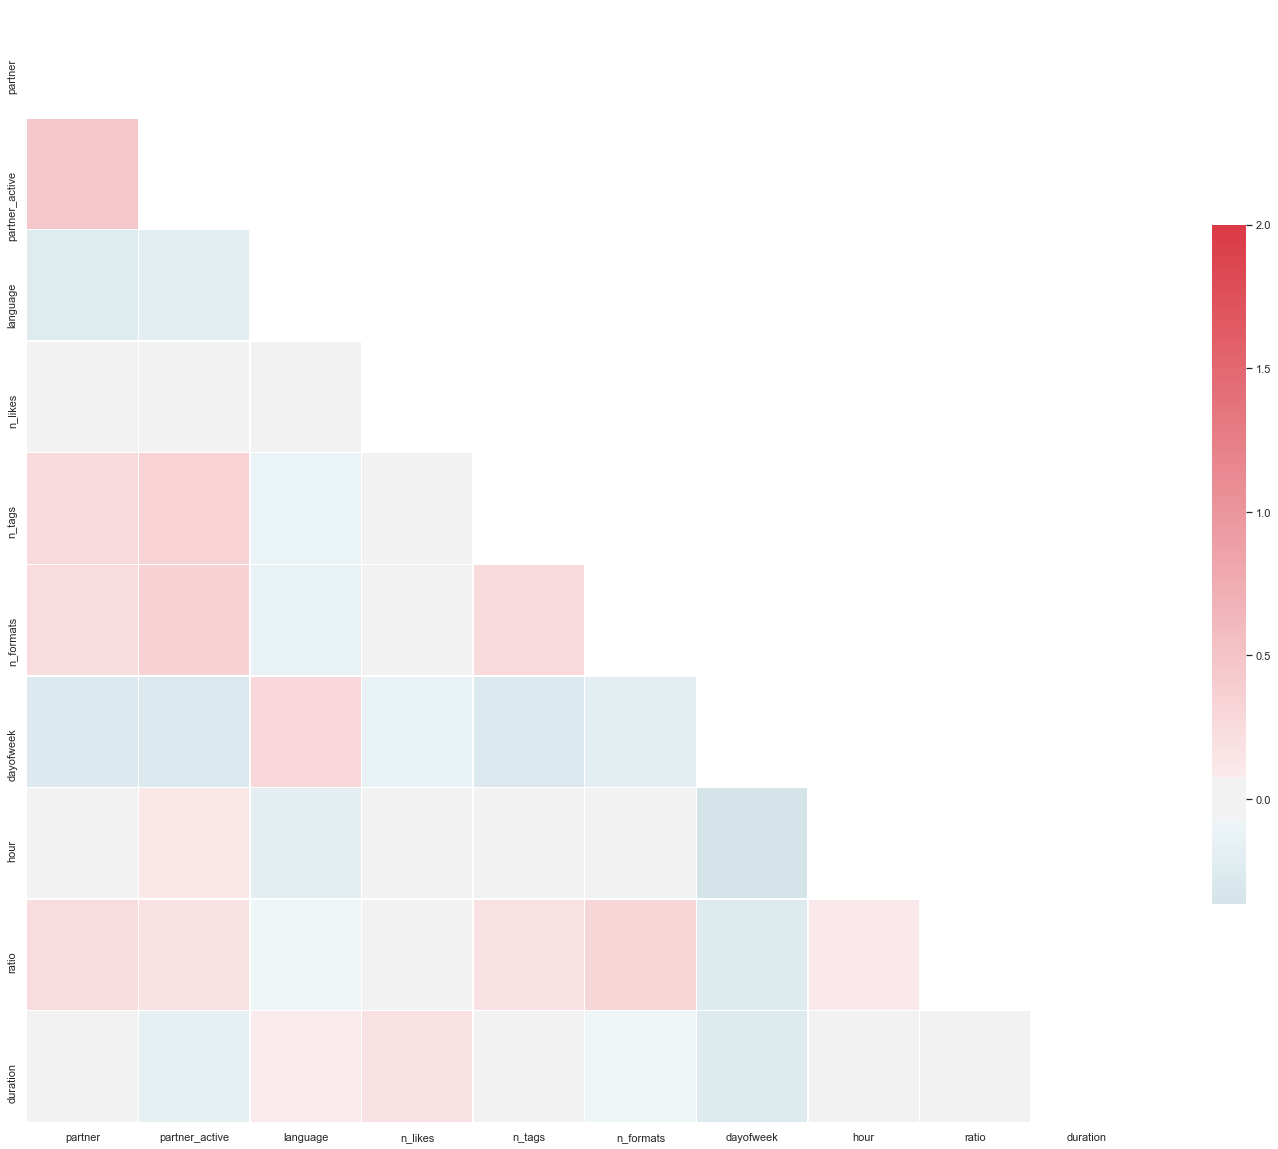

In [30]:
sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [31]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)

len(x_train.columns)

10

In [32]:
len(inputs.columns) 

10

# Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [34]:
n_estimators = list(range(1,100,1))

# Maximum number of levels in tree
max_depth = list(range(1,50))
# Minimum number of samples required to split a node
min_samples_split = list(range(1,30))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,30))
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap
              }

In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 50 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(rf,random_grid,cv=40, verbose=1, random_state=7, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 40 folds for each of 10 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   17.3s finished


RandomizedSearchCV(cv=40, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29],

In [36]:
# We can view the best parameters from fitting the random search:
rf_random.best_params_

{'n_estimators': 55,
 'min_samples_split': 22,
 'min_samples_leaf': 2,
 'max_depth': 41,
 'bootstrap': True}

In [37]:
# Random Forest model with best parameters
rfr= RandomForestRegressor(n_estimators=rf_random.best_params_["n_estimators"],
#                            max_features=rf_random.best_params_["max_features"],
#                             max_depth=rf_random.best_params_["max_depth"], 
#                             min_samples_split=rf_random.best_params_["min_samples_split"],
#                             min_samples_leaf=rf_random.best_params_["min_samples_leaf"],
#                            bootstrap=rf_random.best_params_['bootstrap'],
                           n_jobs=-1, 
                           random_state=7)
rfr.fit(inputs_scaled,target)

RandomForestRegressor(n_estimators=55, n_jobs=-1, random_state=7)

In [38]:
#Scores for Train data and test data
rf_y_train_pre=rfr.predict(x_train)
print('Accuracy score of train data :{}'.format(rfr.score(x_train,y_train)))
rf_y_test_pre=rfr.predict(x_test)
print('Accuracy score of validation data :{}'.format(rfr.score(x_test,y_test)))

Accuracy score of train data :0.8948845836770395
Accuracy score of validation data :0.8954554740046241


In [39]:
#RMSE
def RMSE(actual,prediction):
    rmse=np.sqrt(mean_squared_error(actual, prediction))
    return rmse

In [40]:
print('RMSE - {}'.format(RMSE(y_test,rf_y_test_pre)))

RMSE - 0.4517972798654373


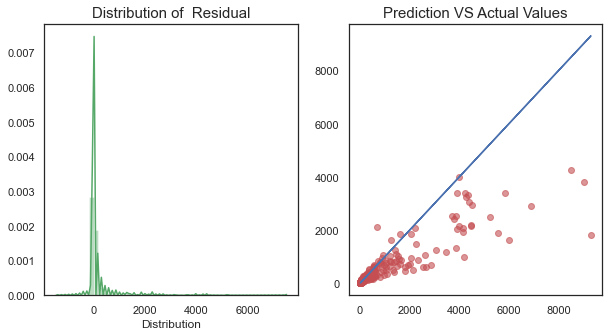

In [41]:
# distribution of residual
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(np.exp(y_test)-np.exp(rf_y_test_pre),color='g')
plt.title('Distribution of  Residual', fontsize=15)
plt.xlabel('Distribution')

plt.subplot(1,2,2)
plt.scatter(np.exp(y_test), np.exp(rf_y_test_pre),color='r',alpha=0.6)
plt.plot(np.exp(y_test),np.exp(y_test))
plt.title('Prediction VS Actual Values',fontsize=15)
plt.show()

# Load the Test Data

In [42]:
raw_test = pd.read_csv('C:/Users/ANKIT/Desktop/Comp/Metadata/public_meta_df.csv')
raw_test.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,False,True,1.33333,1675,2,False,False,0,10,2,2,3
1,3002,False,True,1.33333,1479,2,False,False,0,10,2,2,3
2,3003,False,True,1.33333,1505,2,False,False,0,10,2,2,3
3,3004,False,True,1.77778,50,2,True,True,1,6,5,2,3
4,3005,False,True,1.33333,1543,2,False,False,0,6,2,2,3


In [43]:
raw_test.shape

(986, 13)

In [44]:
# select the same columns from train data 

test_df = raw_test[cat_col+num_col]# rename it
test_df.head()# first five rows

,partner,partner_active,language,n_likes,n_tags,n_formats,dayofweek,hour,ratio,duration
0,False,False,2,0,10,2,2,3,1.33333,1675
1,False,False,2,0,10,2,2,3,1.33333,1479
2,False,False,2,0,10,2,2,3,1.33333,1505
3,True,True,2,1,6,5,2,3,1.77778,50
4,False,False,2,0,6,2,2,3,1.33333,1543


In [45]:
# data cleansing
test_df.isnull().sum()

partner           0
partner_active    0
language          0
n_likes           0
n_tags            0
n_formats         0
dayofweek         0
hour              0
ratio             0
duration          0
dtype: int64

In [46]:
test_df['partner'] = test_df['partner'].replace({True: 1, False: 0})
test_df['partner_active'] = test_df['partner_active'].replace({True: 1, False: 0})

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
test_df.head()

,partner,partner_active,language,n_likes,n_tags,n_formats,dayofweek,hour,ratio,duration
0,0,0,2,0,10,2,2,3,1.33333,1675
1,0,0,2,0,10,2,2,3,1.33333,1479
2,0,0,2,0,10,2,2,3,1.33333,1505
3,1,1,2,1,6,5,2,3,1.77778,50
4,0,0,2,0,6,2,2,3,1.33333,1543


In [48]:
# standardization
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(test_df[x_train.columns])
# Scale the features and store them in a new variable (the actual scaling procedure)
scaled_test_input = scaler.transform(test_df[x_train.columns])

In [49]:
# Now use the model to predict
test_df_prediction=rfr.predict(scaled_test_input)

# Submission

In [56]:
submission=pd.DataFrame()
submission['comp_id']=raw_test['comp_id']
submission['views']=np.exp(test_df_prediction)
submission.head()

,comp_id,views
0,3001,90.595125
1,3002,77.457177
2,3003,89.207399
3,3004,391.307930
4,3005,186.310648


In [57]:
submission.to_csv('submission_final.csv',index=False,header=True)

In [58]:
submission.shape

(986, 2)